In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

import random_helpers
import phrases_managing as pm

seed = 20171210

def draw_historgam(arr, ax=None, binstep=1):
    if ax is None:
        _, ax = plt.subplots(figsize=(16, 6))
    arr = np.array(arr)
    mn, mx = arr.min(), arr.max()
    x = np.arange(mn, mx - mx % binstep + binstep, binstep)
    ax.hist(arr, bins=x)
    return ax

(2.0, 7.0, 32.0, 35.0)

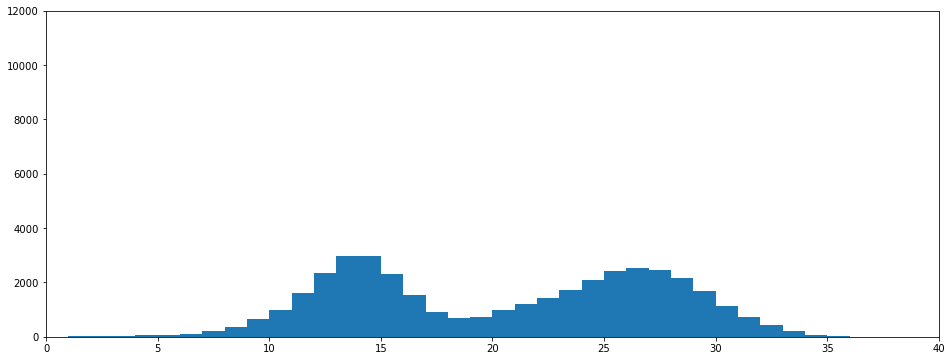

In [402]:
tmp_units_am, tmp_rounds_am = 20, 40000
test_rip_sampler = pm.RipeningSampler(tmp_units_am, olds_insistency=3, weights=np.array([2, 1, 1, 1]).repeat(5))
game_hist = test_rip_sampler.give_n_next(tmp_rounds_am)
gaps = pd.Series(pm.give_gaps(tmp_units_am, game_hist))
ax = draw_historgam(gaps, binstep=1)
ax.set_ylim(0, 6 * tmp_rounds_am / tmp_units_am)
ax.set_xlim(0, tmp_units_am * 2)
np.percentile(gaps, .1), np.percentile(gaps, 1), np.percentile(gaps, 99), np.percentile(gaps, 99.9)

In [404]:
test_phr_mngr = pm.PhraseManager('кожаные мясные гадкие жалкие мерзкие'.split(' '), weights_arr=[4,1,1,1,1])

In [405]:
print('rs weights:', test_phr_mngr.rs._weights)
print('rs items arr:', test_phr_mngr.rs.items_arr)
print('rs items am:', test_phr_mngr.rs.am)
test_phr_mngr.df

rs weights: [4 1 1 1 1]
rs items arr: [0 1 2 3 4]
rs items am: 5


item  weight  activation
0  кожаные       4    1.000000
1   мясные       1   74.989421
2   гадкие       1    4.216965
3   жалкие       1   17.782794
4  мерзкие       1  316.227766

In [381]:
test_phr_mngr.give_n_next(10)

2     гадкие
0    кожаные
3     жалкие
0    кожаные
1     мясные
4    мерзкие
0    кожаные
3     жалкие
2     гадкие
0    кожаные
Name: item, dtype: object

In [382]:
test_phr_mngr.df = test_phr_mngr.df.drop([1,2], axis=0)
test_phr_mngr.items_modified()

In [383]:
# test_phr_mngr.add_items(['уродливые', 'а', 'b', 'c'], weights=[5, 1, 1, 1])
print('rs weights:', test_phr_mngr.rs._weights)
print('rs items arr:', test_phr_mngr.rs.items_arr)
print('rs items am:', test_phr_mngr.rs.am)
test_phr_mngr.df

rs weights: [4 1 1]
rs items arr: [0 1 2]
rs items am: 3


item  weight  activation
0  кожаные       4    4.000000
3   жалкие       1   17.782794
4  мерзкие       1  316.227766

In [373]:
test_phr_mngr.give_n_next(30)

4      мерзкие
1       мясные
0      кожаные
5    уродливые
2       гадкие
3       жалкие
5    уродливые
0      кожаные
8            c
5    уродливые
6            а
0      кожаные
4      мерзкие
5    уродливые
7            b
1       мясные
0      кожаные
5    уродливые
2       гадкие
3       жалкие
0      кожаные
5    уродливые
8            c
6            а
4      мерзкие
0      кожаные
5    уродливые
1       мясные
7            b
0      кожаные
Name: item, dtype: object